# Hands-on

#### Importando bibliotecas

In [39]:
import pandas as pd
import numpy as np
# demais pacotes serão importados, mas vamos adicioná-los à medida que houver necessidade 

#### Adquirindo os dados

Vamos fazer a leitura de nossos dados utilizando Pandas

In [40]:
data = pd.read_csv('bases/forestfires.csv',sep=';')

# Imprimindo as primeiras 5 linhas
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,NaN,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,NaN,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [41]:
# podemos usar o método info() que é útil para obter uma rápida descrição dos dados, em particular o número de linhas, o tipo de cada 
# atributo e o número de valores não nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    491 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Todos os atributos são ou int ou float, exceto month e day, que é object.

## ToDo 1
Retorne uma Serie que informe os dados presentes na coluna month com a respectiva contagem de quantas vezes esse dado aparece no dataset

In [43]:
# Resposta

#data_new = data['month'].value_counts()
#data_new

month = []
qtde_month = []
by_month = data.groupby(by='month')
for name, group in by_month:
    month.append(name)
    qtde_month.append(len(group))

months = pd.Series(data=qtde_month, index=month)
months

apr      9
aug    184
dec      9
feb     20
jan      2
jul     32
jun     17
mar     54
may      2
nov      1
oct     15
sep    172
dtype: int64

## ToDo 2
Percebemos que existem alguns meses com valores insignificantes. Remova do dataset as informações sobre os meses cujo valor é menor ou igual a 2

In [44]:
#Resposta

data = data[data['month'].index <= 2]
data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,NaN,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0


In [6]:
# O método describe() apresenta um resumo dos atributos numéricos
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,3.000000,3.000000,3.0,3.0
mean,7.0,4.333333,89.133333,35.100000,483.433333,6.166667,8.2,39.000000,2.966667,0.0,0.0
std,0.0,0.577350,2.540341,8.753856,337.116854,0.923760,NaN,10.392305,3.239341,0.0,0.0
min,7.0,4.000000,86.200000,26.200000,94.300000,5.100000,8.2,33.000000,0.900000,0.0,0.0
25%,7.0,4.000000,88.400000,30.800000,381.700000,5.900000,8.2,33.000000,1.100000,0.0,0.0
50%,7.0,4.000000,90.600000,35.400000,669.100000,6.700000,8.2,33.000000,1.300000,0.0,0.0
75%,7.0,4.500000,90.600000,39.550000,678.000000,6.700000,8.2,42.000000,4.000000,0.0,0.0
max,7.0,5.000000,90.600000,43.700000,686.900000,6.700000,8.2,51.000000,6.700000,0.0,0.0


## ToDo 3

É possível notar que grande parte da distribuição do atributo meta se concentra numa área de até 6,58 ha (hectares -> 1ha == 10000m²). Use o método cut do Pandas para verificar os agrupamentos de área queimada. Crie uma nova coluna chamada area_cat e utilize os seguintes bins: 0-5, 5-10, 10-50, 50-100, >100. Leve em consideração o valor máximo presente nos dados.

In [48]:
# Resposta
data['area_cat'] = pd.cut(np.array([1, 7, 5, 4, 6, 3]), bins=[0, 5, 10, 50, 100, 1100])

ValueError: Length of values (6) does not match length of index (3)

Drop a coluna area_cat, pois no vamos utilizá-la mais

In [27]:
#data.drop(columns=['area_cat'], inplace=True)
#data.head(3)

## ToDo 4

Use a combinação de Pandas + Matplotlib e retorne um histograma de cada uma das variáveis numéricas presente no dataset

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

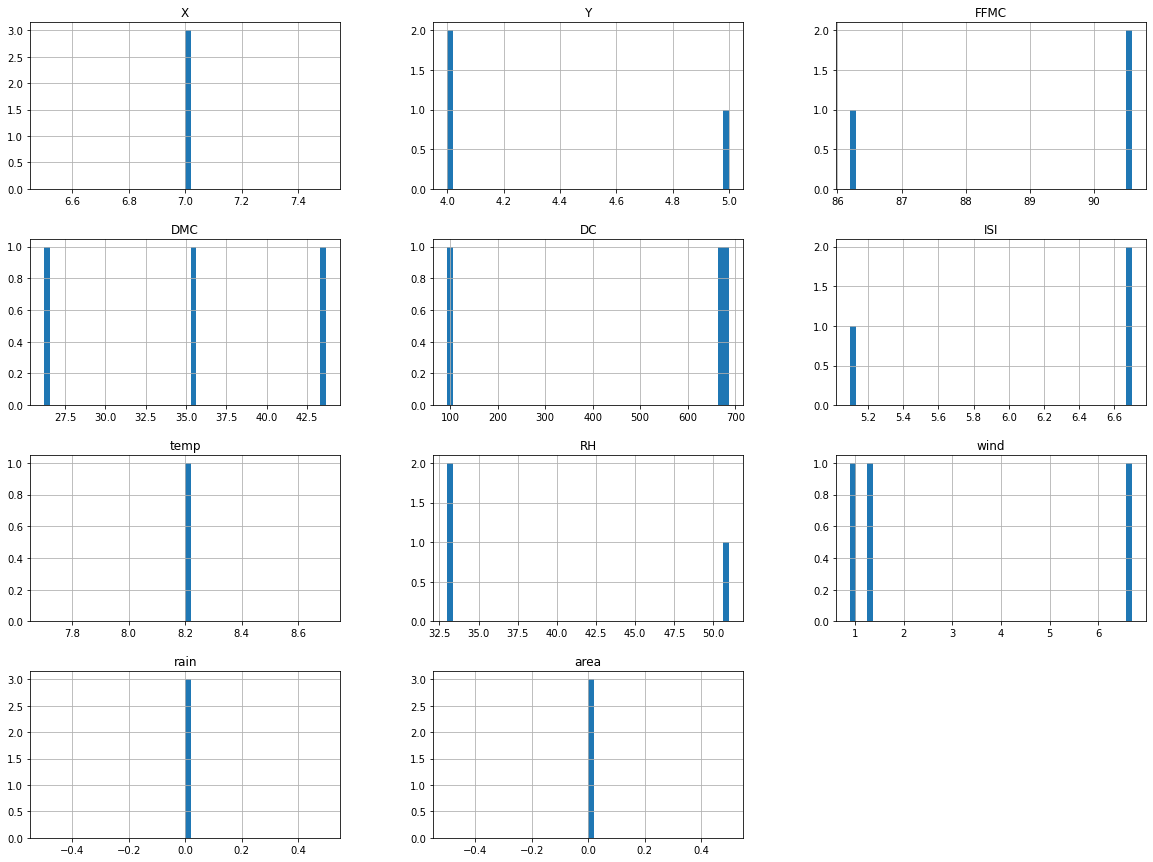

In [45]:
# Resposta
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))


## ToDo 5

Seguindo o mesmo procedimento, imprima os boxplots de cada coluna numérica

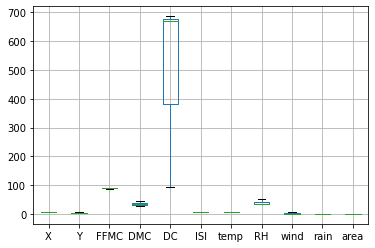

In [29]:
# Resposta
data_num = data.select_dtypes(include=['float64', 'int64']);
boxplot = data_num.boxplot()

## ToDo 6

Calcule a correlação dos atributos descritores com o atributo meta

In [46]:
# Resposta
corr_matrix = data.corr()
corr_matrix['area'].sort_values(ascending=False)
#metódo corr

X      NaN
Y      NaN
FFMC   NaN
DMC    NaN
DC     NaN
ISI    NaN
temp   NaN
RH     NaN
wind   NaN
rain   NaN
area   NaN
Name: area, dtype: float64

## Preparando os Dados para Algoritmos de Machine Learning

## ToDo 7

Crie duas variáveis: features e labels. A primeira vai conter todas as colunas, menos 'area'. A segunda, apenas a coluna área. 

In [49]:
# Resposta
features = data[data.columns[~data.columns.isin(['area'])]]
labels = data['area']

# Scikit-Learn

### Limpeza dos Dados

In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       3 non-null      int64  
 1   Y       3 non-null      int64  
 2   month   3 non-null      object 
 3   day     3 non-null      object 
 4   FFMC    3 non-null      float64
 5   DMC     3 non-null      float64
 6   DC      3 non-null      float64
 7   ISI     3 non-null      float64
 8   temp    1 non-null      float64
 9   RH      3 non-null      int64  
 10  wind    3 non-null      float64
 11  rain    3 non-null      float64
dtypes: float64(7), int64(3), object(2)
memory usage: 312.0+ bytes


In [ ]:
# features.dropna(subset=["temp"]) # opção 1
# features.drop("temp", axis=1) # opção 2
# median = features["temp"].median()
# features["temp"].fillna(median) # opção 3

# lembrando que se a opção 3 for escolhida, precisamos tratar os dados tanto no conjunto de treino quanto no conjunto de teste

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [52]:
features_num = features.drop(['month','day'],axis=1)

In [53]:
# Agora precisamos ajustar a instância do Imputer aos dados de treinamento usando o método fit():
imputer.fit(features_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([  7. ,   4. ,  90.6,  35.4, 669.1,   6.7,   8.2,  33. ,   1.3,
         0. ])

In [55]:
X = imputer.transform(features_num) # o resultado é um numpy.array. Precisamos converter para DataFrame
features_transformed = pd.DataFrame(X, columns=features_num.columns)
features_transformed.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,7.0,4.0,90.6,35.4,669.1,6.7,8.2,33.0,0.9,0.0
2,7.0,4.0,90.6,43.7,686.9,6.7,8.2,33.0,1.3,0.0


In [56]:
# podemos confirmar que os valores faltantes foram todos preenchidos
features_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       3 non-null      float64
 1   Y       3 non-null      float64
 2   FFMC    3 non-null      float64
 3   DMC     3 non-null      float64
 4   DC      3 non-null      float64
 5   ISI     3 non-null      float64
 6   temp    3 non-null      float64
 7   RH      3 non-null      float64
 8   wind    3 non-null      float64
 9   rain    3 non-null      float64
dtypes: float64(10)
memory usage: 368.0 bytes


### Feature Normalization

Com algumas poucas exceções, algoritmos de machine learning não performam bem quando os atributos numéricos possuem escalas diferentes.

Existem duas abordagens conhecidas para trazer os atributos para uma mesma escala: min-max scaling e standardization. 

min-max scaling (normalization) consiste em subtratir o valor minimo e dividir pela subtração de max por min:

\begin{align}
x = \frac{x - min}{max - min}
\end{align}

Já standardization consiste em subtrair a média(valores sempre terao média zero) e então dividir pela variância de modo que a distribuição resultante possua variância unitária. 

\begin{align}
x = \frac{x - \mu}{\sigma}
\end{align}

Diferentemente de normalization, standardization não leva os números a um intervalo específico, o que pode ser um problema para algoritmos específicos (por exemplo, redes neurais geralmente esperam um valor de entrada entre o intervalo 0-1). Entretanto, standardization é muito menos sensível à outiliers. 

Vamos usar as implementações disponíveis na Scikit-Learn.

### Manipulando Atributos Textuais e Categóricos

In [57]:
# separando apenas atributos categóricos
features_cat = features[['month','day']]

In [58]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
features_cat_1hot = encoder.fit_transform(features_cat)
features_cat_1hot

array([[0., 0.],
       [1., 2.],
       [1., 1.]])

### Pipelines de Transformação

In [59]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan, strategy='median')),
])
features_num_tr = num_pipeline.fit_transform(features_num)

## ToDo 8

Complete a classe DataFrameSelector que herde BaseEstimator e TransformerMixin (from sklearn.base import BaseEstimator, TransformerMixin) que implemente 3 métodos:

> __init__: recebe o nome dos atributos

> fit: retorna self

> transform: aciona o atributo values do DataFrame[atributos]

In [60]:
#Resposta
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

A classe DataFrameSelector irá separar o dataframe de acordo com o conteúdo da variável attribute_names, retornando apenas aquelas que são categórias ou aquelas que são numéricas. Essa classe herda os métodos BaseEstimator e TransformerMixin.

O primeiro é responsável por implementar os métodos get_params() e set_params() que são extremamente úteis quando vamos executar um gridsearch, por exemplo. Com essa classe podemos acessar os valores que estão definidos dentro do método __init__, bem como atribuir novos valores apra ele. 

Já TransformerMixin tras implementado o método fit_transform(), que nada mais é do que aplicar o método fit() e, logo em seguida, o método transform.

Esse link pode ajudar a esclarecer melhor as coisas, caso ainda tenham dúvidas: [link](https://github.com/ageron/handson-ml/issues/391)

#### Normalizacao usando Scikit Learn

In [61]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder #skl 0.20>
from sklearn.preprocessing import StandardScaler # MinMaxScaler
num_attribs = list(features_num)
cat_attribs = ['month','day']
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('categorial_encoder', OrdinalEncoder())
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [62]:
features_prepared = full_pipeline.fit_transform(features) #retorna um numpy.array

In [63]:
# Agora temos nossos dados preparados.
features_prepared[0:5,:]

array([[ 0.        ,  1.41421356, -1.41421356, -1.24519172, -1.41372064,
        -1.41421356,  0.        ,  1.41421356,  1.41151554,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.70710678,  0.70710678,  0.04197275,  0.67452664,
         0.70710678,  0.        , -0.70710678, -0.78137467,  0.        ,
         1.        ,  2.        ],
       [ 0.        , -0.70710678,  0.70710678,  1.20321896,  0.739194  ,
         0.70710678,  0.        , -0.70710678, -0.63014086,  0.        ,
         1.        ,  1.        ]])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [65]:
X = features_prepared
y = labels.values
split_test_size = 0.30

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [67]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression()

In [68]:
y_pred = lr_model.predict(X_test)

In [71]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))
#lr_model.score(X_test, y_test)

0.0